<div align="center">
  <b> <font size="6">Linear Regression using Stochastic Gradient Descent</font> </b>
</div>

In [759]:
# Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Step 1: Load the dataset

In [760]:
# Load the dataset into pandas dataframe
dataset = pd.read_csv("D:\\9.BOOKS MATERIALS\\4.PROGRAMS\\Python_Programs\\Datasets\\Advertising.csv")  

In [761]:
# Display the first five records
dataset.head() 

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Advertising data comprises four features: TV, radio, newspaper, and sales. It explains the budget (in 1000$) spent on different mass media and the net outcome for every week. 
<ul>
  <li>sales for a product (<b> output/dependent/target feature </b>).</li>
  <li>advertising budget for TV, radio, and newspaper media (<b> input/independent feature </b>).</li> 
</ul> 
Planning to perform regression on TV budget (X) as input feature and sales (Y) as output feature.# Dataset shape (number of rows and columns)
dataset.shape

<b>Row </b> <=> record, tuple, instance, sample, observation, object, case, entity <br>
<b>Column </b> <=> attribute, variable, field, feature, characteristic, dimension

In [762]:
# Dataset shape (number of rows and columns)
dataset.shape

(200, 4)

### Step 2. EDA

### Step 3. Pre-process and extract the features

In [763]:
# Normalize the data (converting features of different scale into values between 0 and 1) separately for input features and output feature
# For input features
from sklearn import preprocessing
scaler_x = preprocessing.MinMaxScaler() 
scaled_X = scaler_x.fit_transform(dataset.iloc[:,:3]) 
scaled_X
# This scaler object is used to normalize future input values

array([[0.77578627, 0.76209677, 0.60598065],
       [0.1481231 , 0.79233871, 0.39401935],
       [0.0557998 , 0.92540323, 0.60686016],
       [0.50997633, 0.83266129, 0.51187335],
       [0.60906324, 0.21774194, 0.51099384],
       [0.02705445, 0.9858871 , 0.65699208],
       [0.19208657, 0.66129032, 0.20404573],
       [0.4041258 , 0.39516129, 0.09938434],
       [0.02671627, 0.04233871, 0.00615655],
       [0.67331755, 0.05241935, 0.18381706],
       [0.2211701 , 0.11693548, 0.21020229],
       [0.72370646, 0.48387097, 0.03254178],
       [0.07811972, 0.70766129, 0.5769569 ],
       [0.32735881, 0.15322581, 0.06068602],
       [0.68785932, 0.66330645, 0.40193492],
       [0.65843761, 0.96169355, 0.46262093],
       [0.22691917, 0.73790323, 1.        ],
       [0.94927291, 0.7983871 , 0.48812665],
       [0.2316537 , 0.41330645, 0.15831135],
       [0.49577274, 0.48185484, 0.16534741],
       [0.73621914, 0.55846774, 0.46701847],
       [0.80047345, 0.10282258, 0.20404573],
       [0.

In [764]:
# For output feature
scaler_y = preprocessing.MinMaxScaler() 
scaled_Y = scaler_y.fit_transform(dataset[['sales']]) 
scaled_Y

array([[0.80708661],
       [0.34645669],
       [0.30314961],
       [0.66535433],
       [0.44488189],
       [0.22047244],
       [0.4015748 ],
       [0.45669291],
       [0.12598425],
       [0.35433071],
       [0.27559055],
       [0.62204724],
       [0.2992126 ],
       [0.31889764],
       [0.68503937],
       [0.81889764],
       [0.42913386],
       [0.8976378 ],
       [0.38188976],
       [0.51181102],
       [0.64566929],
       [0.42913386],
       [0.15748031],
       [0.54724409],
       [0.31889764],
       [0.40944882],
       [0.52755906],
       [0.56299213],
       [0.68110236],
       [0.3503937 ],
       [0.77952756],
       [0.40551181],
       [0.31496063],
       [0.62204724],
       [0.31102362],
       [0.44094488],
       [0.93700787],
       [0.51574803],
       [0.33464567],
       [0.78346457],
       [0.59055118],
       [0.61023622],
       [0.7519685 ],
       [0.44488189],
       [0.27165354],
       [0.52362205],
       [0.35433071],
       [0.850

In [765]:
# numpy array to pandas dataframe
set1 = pd.DataFrame(scaled_X) 
set2 = pd.DataFrame(scaled_Y) 
dataset = pd.concat([set1, set2], axis=1)
dataset.head()

,0,1,2,0
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882


### Step 4. Split the data for training and testing

In [766]:
# Splitting dataset into training and testing set 
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 0)
# It returns numpy array

train, test = train_test_split(dataset, test_size=0.2)
# It returns pandas dataframe

In [767]:
train.shape, test.shape

((160, 4), (40, 4))

In [768]:
train.head()

,0,1,2,0
7,0.404126,0.395161,0.099384,0.456693
153,0.576936,0.800403,0.328936,0.685039
58,0.710517,1.000000,0.328936,0.874016
55,0.670274,0.995968,0.525066,0.870079
60,0.178559,0.040323,0.185576,0.255906


In [769]:
test.head()

,0,1,2,0
154,0.632736,0.425403,0.080915,0.551181
45,0.589787,0.453629,0.274406,0.523622
151,0.406831,0.169355,0.425682,0.393701
143,0.351370,0.114919,0.299912,0.346457
51,0.337166,0.193548,0.029024,0.358268


### Step 5: Training phase (bulding the model) using Gradient Descent

Linear model => y = m1 x1 + m2 x2 + m3 x3 + b. Let us apply gradient descent to obtain the optimal values of m1, m2, m3, and b

##### Parameter initialization

In [770]:
# np.random.seed(13)
# number of iterations (epochs)
epoch = 1000
# learning rate
learn_rate = 0.001
# batch_size  
batch_size = 1  # Try changing the value from 1 to 159
num_parameters = train.shape[1]
record_every = 5

<b> Note: </b> Batch size should be between 1 to number of records (n) in x_train. If batch size is 
<ul>
  <li>1 - It is stochastic gradient descent. We randomly pick 1 training sample every iteration, perform forward pass, compute the error and immidiately adjust the parameters.</li>
  <li>2 to n/2 - It is called mini batch stochastic gradient descent. We randomly pick a batch training samples every iteration, perform forward pass, compute the error and immidiately adjust the parameters. </li>
  <li>n - It is called batch gradient descent (simple gradient decent). We use all the training samples in forward pass to calculate cumulitive error and than we adjust the parameter values</li>
</ul>

##### Objective, Derivative, and Cost function

In [771]:
# Prediction function  
def predict(w, b, x_train):
    return np.dot(w, x_train.T) + b

In [772]:
# Partial derivative of SSE with respect to all m and b
def gradient(x_train, y_train, y_predicted):
    w_grad = -(2/x_train.shape[0]) * (x_train.T.dot(y_train - y_predicted)) 
    b_grad = -(2/x_train.shape[0]) * np.sum(y_train - y_predicted)
    return w_grad, b_grad

In [773]:
# SSE (cost/loss/error) calculation
def cost_fun(y_train,y_predicted):
    error = (y_train - y_predicted)  
    MSE = np.mean(np.square(error))
    return MSE

##### Gradient descent algorithm for 2 parameters

In [774]:
# Gradient descent algorithm
# We used numpy to perform matrix operations very easily

def gradient_descent():
    
    num_input_features = train.shape[1]-1
    # track all solutions
    parameter_values = np.zeros([int(epoch/record_every), num_parameters]) 
    ind = 0
    
    Cost = list()    
    Epoch = list()
    
    # generate an initial point for parameters m1, m2, m3, and b
    weights = np.ones(shape=(num_input_features)) 
    bias = 1  
    
    # run the gradient descent
    for i in range(epoch): 
        
        # Forming the batch
        sampled_train_data = train.sample(batch_size)
        # input features
        x_train_batch = sampled_train_data.iloc[:,:num_features].values     
        # output feature     
        y_train_batch = sampled_train_data.iloc[:,num_features].values 
                
        # prediction
        y_predicted = predict(weights, bias, x_train_batch) 
        
        # gradient calculation
        w_grad, b_grad = gradient(x_train_batch, y_train_batch, y_predicted) 
        
        # step size calculation
        weights_step = learn_rate * w_grad
        bias_step = learn_rate * b_grad  
        
        # solution update
        weights = weights - weights_step 
        bias = bias - bias_step 
        
        # SSE (error/cost/loss) calculation
        MSE = cost_fun(y_train_batch, y_predicted)  
       
        # store the solution    
        if i%record_every == 0:
            Cost.append(MSE)
            Epoch.append(i)
            parameter_values[ind, :3] = weights
            parameter_values[ind, 3] = bias
            ind = ind + 1
        
        # report progress
        # print('>epoch %d => m %.5f b %.5f cost %.3f ' % (i, curr_soln_m, curr_soln_b,SSE))
        
    return [weights, bias, Cost, Epoch, y_predicted, parameter_values]

In [775]:
# perform the gradient descent search
weights, bias, Cost, Epoch, y_predicted, parameter_values = gradient_descent()

In [776]:
weights

array([0.47481497, 0.40704901, 0.63172757])

In [777]:
bias

-0.04832138204354932

In [778]:
Cost

[2.723353055381845,
 3.7223864526088706,
 1.044665323785933,
 4.989928440117826,
 2.1110635066383185,
 4.659395508760331,
 3.192240879540807,
 2.457950169062006,
 1.811870892665926,
 1.7249918341388335,
 3.1986515345705757,
 4.5243790365254215,
 5.34649142700252,
 1.5691845766868082,
 1.6789068836935954,
 3.281416277916168,
 1.3253491921354295,
 1.723798264704423,
 3.051485302940421,
 2.38363272164428,
 1.28778397431157,
 2.3384888009287073,
 2.14872184560274,
 1.0776076539285702,
 1.2243178803026284,
 0.8965042901702095,
 1.862468443863157,
 0.6191630132770729,
 1.4615253608727046,
 1.6748959195747566,
 0.6363233421871168,
 2.749112714179205,
 1.1502457894186715,
 0.4284689048087582,
 1.4350918847307086,
 0.8324176146975264,
 0.9972340774235142,
 0.9801572227371088,
 1.8434542910329283,
 0.7395716362120097,
 0.4239908264221963,
 2.186565471044795,
 0.49933479663266933,
 0.19797750191082816,
 0.5514175909106585,
 0.26086195842515536,
 0.4543870191081028,
 1.9490705411815714,
 1.2071333

You can observe the fluctuation in the cost (not converging). It is due to selecting records in random.

In [779]:
parameter_values

array([[ 9.97668319e-01,  9.98629221e-01,  9.99698106e-01,
         9.96699483e-01],
       [ 9.89449193e-01,  9.91071068e-01,  9.93024743e-01,
         9.78878013e-01],
       [ 9.84090762e-01,  9.79221083e-01,  9.86975010e-01,
         9.61515882e-01],
       [ 9.79295816e-01,  9.63834841e-01,  9.77093419e-01,
         9.41949863e-01],
       [ 9.74817577e-01,  9.54675510e-01,  9.72671077e-01,
         9.25795900e-01],
       [ 9.58736468e-01,  9.42200212e-01,  9.62493957e-01,
         9.05584147e-01],
       [ 9.49165600e-01,  9.34918860e-01,  9.60012726e-01,
         8.90564206e-01],
       [ 9.42668846e-01,  9.29295269e-01,  9.57027302e-01,
         8.76112664e-01],
       [ 9.33791447e-01,  9.21425681e-01,  9.53654924e-01,
         8.60940586e-01],
       [ 9.28205233e-01,  9.11208301e-01,  9.48949648e-01,
         8.45633365e-01],
       [ 9.16451096e-01,  9.02884472e-01,  9.41952700e-01,
         8.29404603e-01],
       [ 9.10955343e-01,  8.95524366e-01,  9.36301187e-01,
      

##### Plotting observed sale (x) and predicted sale (y) for training set

In [780]:
x_train = train.iloc[:,:num_features].values   
y_train = train.iloc[:,num_features].values 
y_train_predicted = predict(weights, bias, x_train)

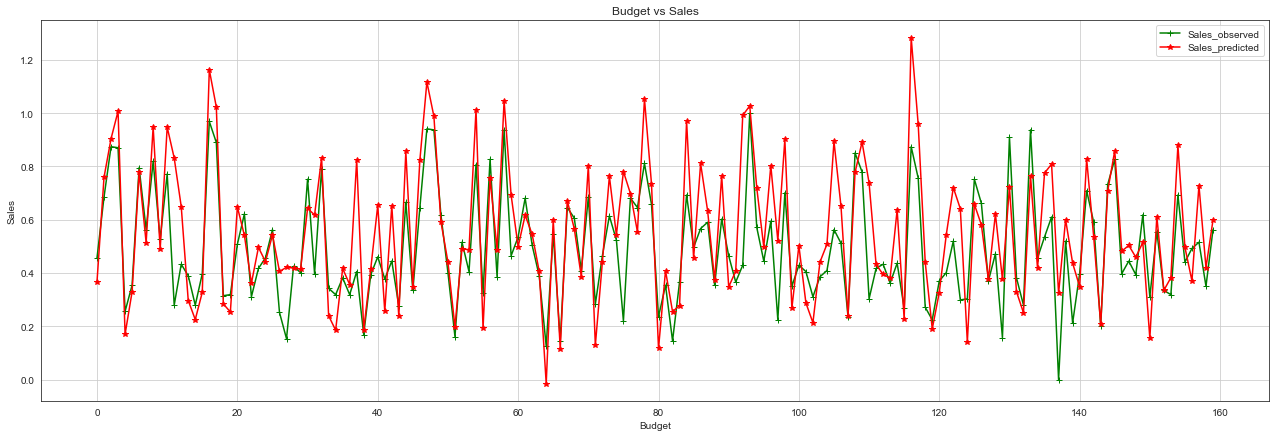

In [781]:
x = np.arange(len(y_train_predicted)) 
fig = plt.figure(figsize = (22, 7)) 
plt.plot(x, y_train, "g-+", label = "Sales_observed")
plt.plot(x, y_train_predicted, "r-*", label = "Sales_predicted")
plt.grid(b = None) 
plt.xlabel("Budget")
plt.ylabel("Sales")
plt.title("Budget vs Sales")
plt.legend()
plt.show() 

#### Residual (Error) plot 

If the model has done good predictions, then the datapoints must be near around to horizontal line.

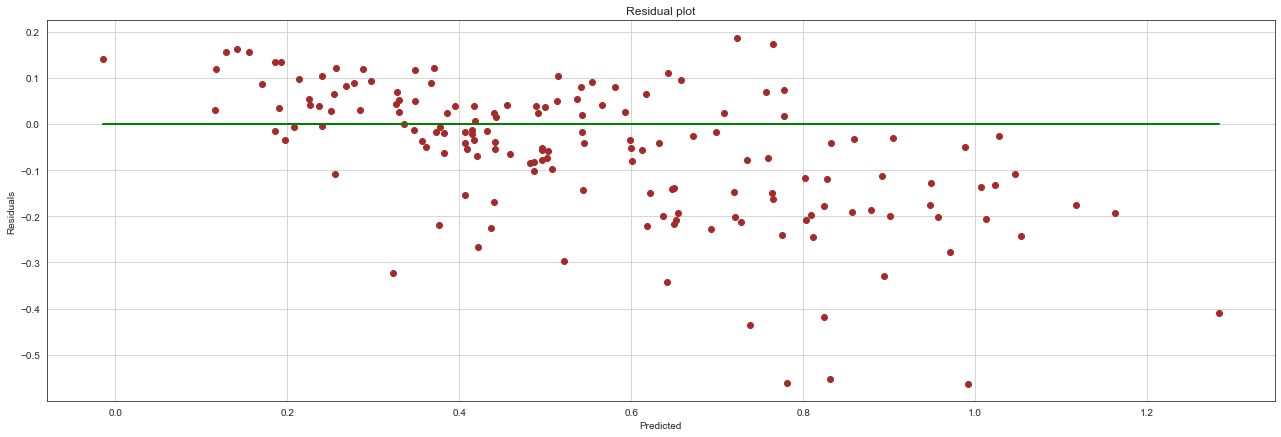

In [782]:
sns.set_style(style='white') 
fig = plt.figure(figsize = (22, 7)) 
residuals = y_train - y_train_predicted
zeros = y_train - y_train
plt.scatter(y_train_predicted, residuals, color = "brown")
plt.grid(b = None) 
plt.plot(y_train_predicted, zeros, "g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot") 
plt.show()

##### Plotting SSE minimization

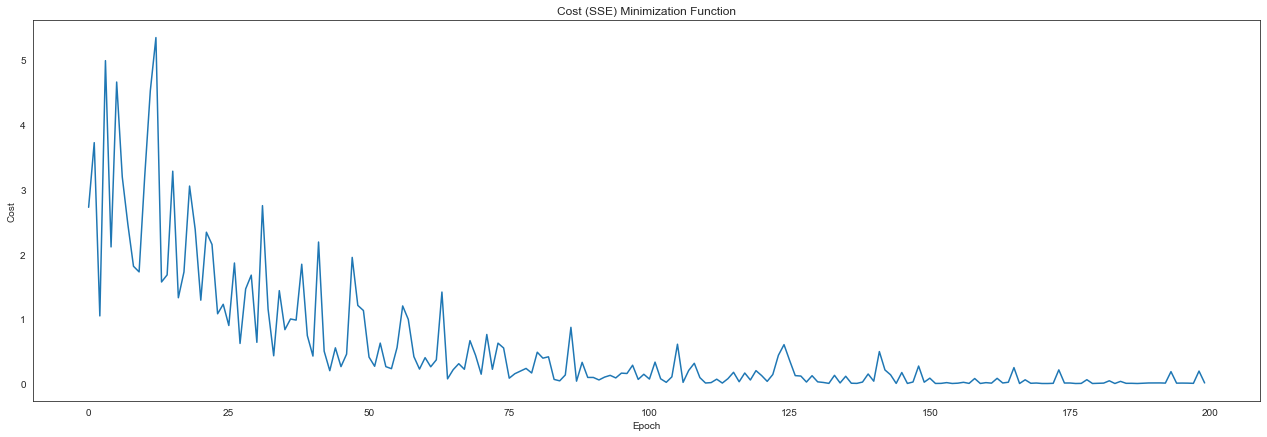

In [783]:
cost = np.array(Cost)
x = np.arange(cost.shape[0])
fig = plt.figure(figsize = (22, 7)) 
plt.plot(x,cost)  
plt.xlabel("Epoch")
plt.ylabel("Cost")  
plt.title("Cost (SSE) Minimization Function")
plt.show() 

##### Plotting weights and bias convergence

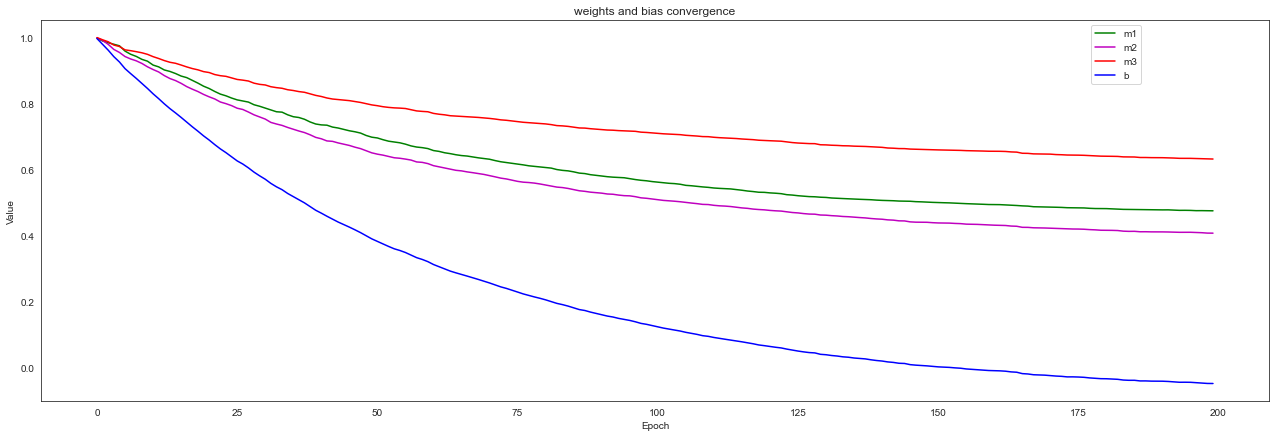

In [784]:
fig = plt.figure(figsize = (22,7)) 
plt.plot(x, parameter_values[:,0], "g", label="m1") 
plt.plot(x, parameter_values[:,1], "m", label="m2") 
plt.plot(x, parameter_values[:,2], "r", label="m3") 
plt.plot(x, parameter_values[:,3], "b", label="b") 
plt.xlabel("Epoch")
plt.ylabel("Value")  
plt.title("weights and bias convergence")
plt.legend(loc = "upper right", bbox_to_anchor = (0.0, 0.0, 0.9, 1.0))
plt.show() 

#### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [785]:
Train_MSE = cost_fun(y_train, y_train_predicted)
print("MSE for trianing set is :", Train_MSE)

MSE for trianing set is : 0.024698245354540672


In [786]:
from sklearn.metrics import r2_score
out = r2_score(y_train, y_train_predicted)
Train_RS = np.round(out,2)*100
print("R-Squred value (goodness of model) for training set :",Train_RS,"%") 

R-Squred value (goodness of model) for training set : 42.0 %


### Step 6: Testing phase

In [787]:
# Predicting values for test input set
x_test = test.iloc[:,:num_features].values   
y_test = test.iloc[:,num_features].values 
y_test_predicted = predict(weights, bias, x_test)

##### Plotting observed sale (x) and predicted sale (y) for test set

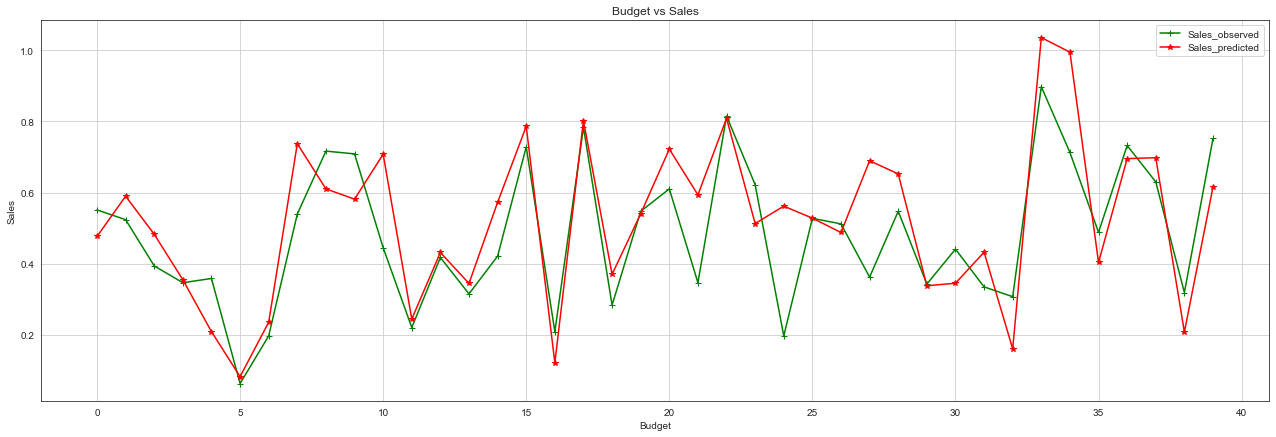

In [788]:
x = np.arange(len(y_test_predicted)) 
fig = plt.figure(figsize = (22, 7)) 
plt.plot(x, y_test, "g-+", label = "Sales_observed")
plt.plot(x, y_test_predicted, "r-*", label = "Sales_predicted")
plt.grid(b = None) 
plt.xlabel("Budget")
plt.ylabel("Sales")
plt.title("Budget vs Sales")
plt.legend()
plt.show() 

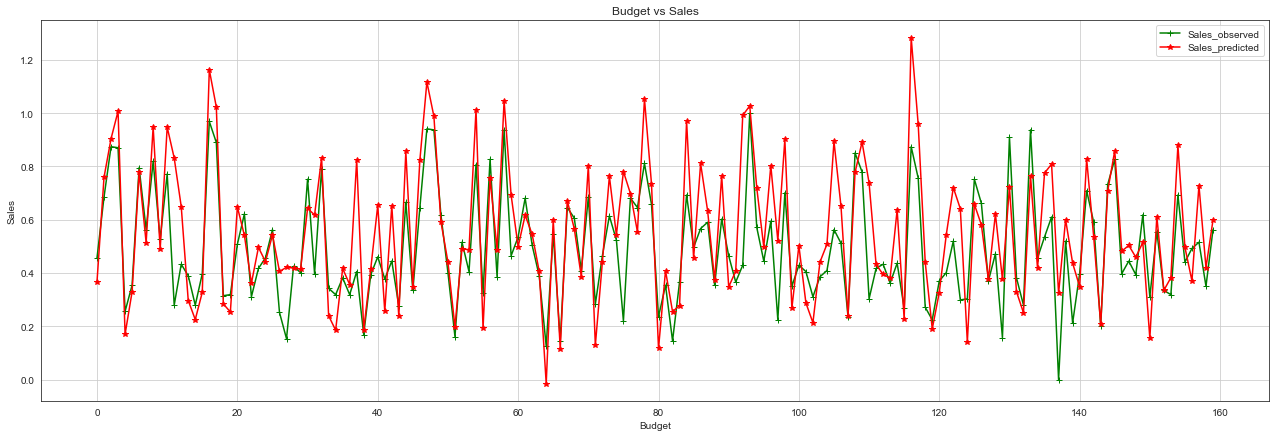

In [789]:
x = np.arange(len(y_train_predicted)) 
fig = plt.figure(figsize = (22, 7)) 
plt.plot(x, y_train, "g-+", label = "Sales_observed")
plt.plot(x, y_train_predicted, "r-*", label = "Sales_predicted")
plt.grid(b = None) 
plt.xlabel("Budget")
plt.ylabel("Sales")
plt.title("Budget vs Sales")
plt.legend()
plt.show() 

#### Residual (Error) plot 

If the model has done good predictions, then the datapoints must be near around to horizontal line.

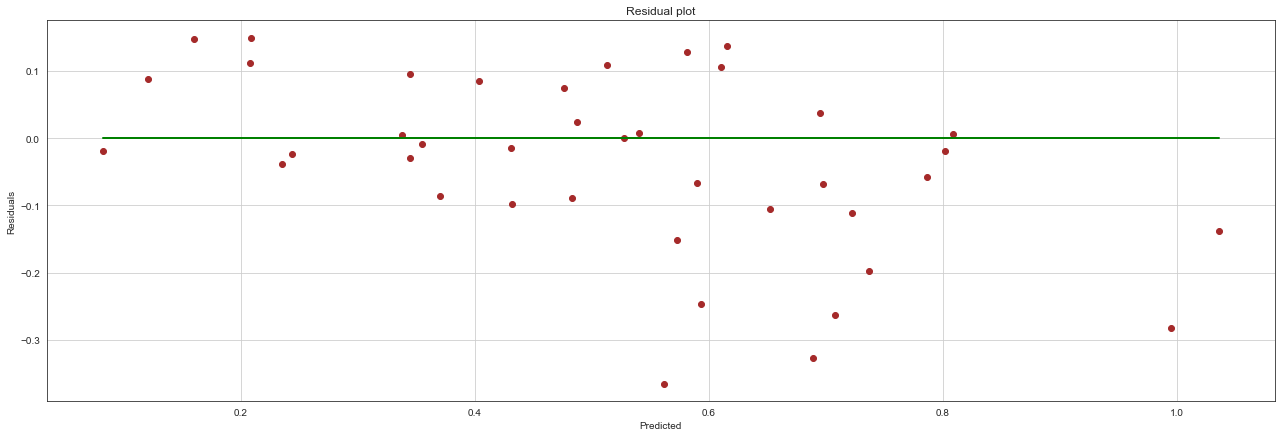

In [790]:
sns.set_style(style = 'white') 
fig = plt.figure(figsize = (22,7)) 
residuals = y_test - y_test_predicted
zeros = y_test - y_test
plt.scatter(y_test_predicted, residuals, color = "brown")
plt.grid(b = None) 
plt.plot(y_test_predicted, zeros, "g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

#### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [791]:
Test_MSE = cost_fun(y_test, y_test_predicted)
print("MSE for testing set is :", Test_MSE)

MSE for testing set is : 0.01854330717519913


In [792]:
from sklearn.metrics import r2_score
out = r2_score(y_test, y_test_predicted)
Test_RS = np.round(out, 2) * 100
print("R-Squred value (goodness of model) for testing set :",Test_RS,"%")  

R-Squred value (goodness of model) for testing set : 52.0 %


### Performance observation

In [793]:
print("Error \t From training phase       From testing phase ")
print("===================================================") 
print("MSE   \t",Train_MSE,"\t", Test_MSE) 

Error 	 From training phase       From testing phase 
MSE   	 0.024698245354540672 	 0.01854330717519913


### Step 7: Let us predict for real-time input data

We need to pass input values for all the features to the prediction function. However, the model takes scaled/normalized input values.

1. Given TV = 50$, radio = 30$, newspaper = 10$, what is the expected sales?

In [794]:
# scaled_input = scaler_x.transform([[50, 30, 100]])
scaled_input = scaler_x.transform([[50, 30, 100]])[0] 
#scaled_input = scaler_x.transform([[50, 30, 100]])[0][0] extracts only values
scaled_input

array([0.16672303, 0.60483871, 0.87686895])

In [795]:
new_predicted = predict(weights, bias, scaled_input)
new_predicted 

0.8309824929137175

The output is also the scaled value. So, do inverse trnasform with y scaler

In [796]:
output = scaler_y.inverse_transform([[new_predicted]])[0][0]
output

22.706955320008426